## Expolotary Data Analysis

In [1]:
## import basic liabary

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("dataset.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2 Check basic information

2.1 top 5 row

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


2.2 bottom 5 record

In [8]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


2.3 checking data information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
## as per data infomation , there are 5 categorical feature and 3 numerical feature

2.4 statatics information for numerical feature

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


as per statatics information, the mean for each feature similary, where math_score:66.08, reading_score:69.16, writing_score:68,
and standard devition also each other similary, but minimum score of math score is 0.00 , reading score: 17 and writing score: 10 

## 3 Data Cleaning

3.1 checking null value

In [12]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
## there is not indicating any null values

3.2 checking duplicate value

In [14]:
df.duplicated().sum()

np.int64(0)

there are no any duplicate value in this dataset

3.3 unique value

In [15]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

there are 2 number of unique value in gender, race_ethinicity:5, parental_level_of_education:6, lunch:2 test_prepration_course:2

## 4 Feature Understanding

In [16]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [27]:
categorical_feature = df.select_dtypes(include='object').columns
numerical_feature = df.select_dtypes(include='int').columns
print("-----------------------------------------------")
print(f"we have numerical feature: {numerical_feature}")
print("-----------------------------------------------")
print(f"we have categorical feature: {categorical_feature}")
print("----------------------------------------------------")

-----------------------------------------------
we have numerical feature: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
-----------------------------------------------
we have categorical feature: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')
----------------------------------------------------


adding average and total_score colums

In [30]:
df['average_score'] = df['math_score'] + df['reading_score'] + df['writing_score']/3
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score'] + df['average_score']

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,168.666667,386.666667
1,female,group C,some college,standard,completed,69,90,88,188.333333,435.333333
2,female,group B,master's degree,standard,none,90,95,93,216.000000,494.000000
3,male,group A,associate's degree,free/reduced,none,47,57,44,118.666667,266.666667
4,male,group C,some college,standard,none,76,78,75,179.000000,408.000000


In [37]:
print("Counting categorical values")

for col in categorical_feature:
    print(f"\ncolumns{col}")
    print(df[col].value_counts())

    

Counting categorical values

columnsgender
gender
female    518
male      482
Name: count, dtype: int64

columnsrace_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

columnsparental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

columnslunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

columnstest_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [39]:
## Overall stats for math_score

In [45]:
print("----maximum score for math socre----")
print(f"maximum score of math:",df['math_score'].max())
print(f"average score of math:", df['math_score'].mean())
print(f"minimum score of math:",df['math_score'].min())



----maximum score for math socre----
maximum score of math: 100
average score of math: 66.089
minimum score of math: 0


In [46]:
print("----maximum and minimum score of reading score----")
print(f"maximum score of reading:",df['reading_score'].max())
print(f"average score of reading:", df['reading_score'].mean())
print(f"minimum score of reading:", df['reading_score'].min())

----maximum and minimum score of reading score----
maximum score of reading: 100
average score of reading: 69.169
minimum score of reading: 17


In [50]:
print("----maximum and minimum score of writing score----")
print(f"maximum score of writing score:", df['writing_score'].max())
print(f"average score of writing score:", df['writing_score'].mean())
print(f"minimum score of writing score:", df['writing_score'].min())

----maximum and minimum score of writing score----
maximum score of writing score: 100
average score of writing score: 68.054
minimum score of writing score: 10


In [56]:
print("\n== math score stats by Gender ===")
for gender in df['gender'].unique():
    gender_df=df[df['gender']==gender]
    print(f"\nGender:{gender}")
    print("MAX:",gender_df['math_score'].max())
    print("AVERAGE:",gender_df['math_score'].mean())
    print("MINIMUM:",gender_df['math_score'].min())


== math score stats by Gender ===

Gender:female
MAX: 100
AVERAGE: 63.633204633204635
MINIMUM: 0

Gender:male
MAX: 100
AVERAGE: 68.72821576763485
MINIMUM: 27


In [62]:
print("\n== reading score stats by gender ===")
for gender in df['gender'].unique():
    gender_df = df[df['gender']==gender]
    print(f"\nGender:{gender}")
    print("MAX:", gender_df['reading_score'].max())
    print("AVERAGE:", gender_df['reading_score'].mean())
    print("MINIMUM:",gender_df['reading_score'].min())


== reading score stats by gender ===

Gender:female
MAX: 100
AVERAGE: 72.60810810810811
MINIMUM: 17

Gender:male
MAX: 100
AVERAGE: 65.47302904564316
MINIMUM: 23


In [67]:
print("\n=== writing score stats by gender ===")
for gender in df['gender'].unique():
    gender_df=df[df['gender']==gender]
    print(f"\nGender:{gender} ")
    print("MAX:",gender_df['writing_score'].max())
    print("AVERAGE:", gender_df['writing_score'].mean())
    print("MIN:", gender_df['writing_score'].min())
    


=== writing score stats by gender ===

Gender:female 
MAX: 100
AVERAGE: 72.46718146718146
MIN: 10

Gender:male 
MAX: 100
AVERAGE: 63.31120331950208
MIN: 15


## DATA VISUALIZATION

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   total_score                  1000 non-null   float64
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


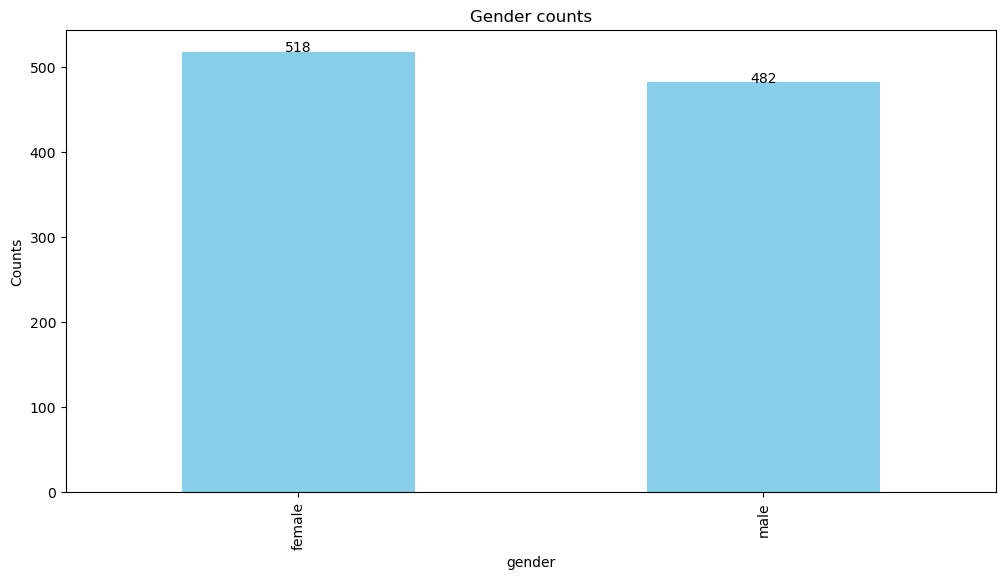

In [97]:
plt.figure(figsize=(12,6))
counts=df['gender'].value_counts()
ax = counts.plot(kind='bar',color='skyblue')

for i, v in enumerate(counts):
    ax.text(i,v + 0.1, str(v), ha='center')
plt.ylabel("Counts")
plt.title("Gender counts")
plt.show()

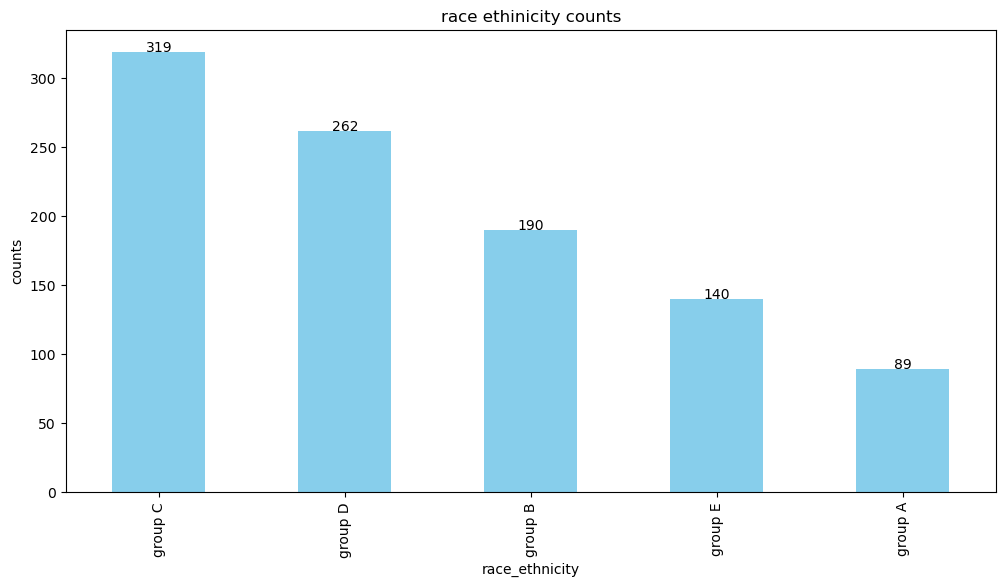

In [98]:
plt.figure(figsize=(12,6))
counts=df['race_ethnicity'].value_counts()
ax = counts.plot(kind='bar',color='skyblue')

for i, v in enumerate(counts):
    ax.text(i,v + 0.1, str(v),ha='center')
plt.ylabel("counts")
plt.title("race ethinicity counts")
plt.show()

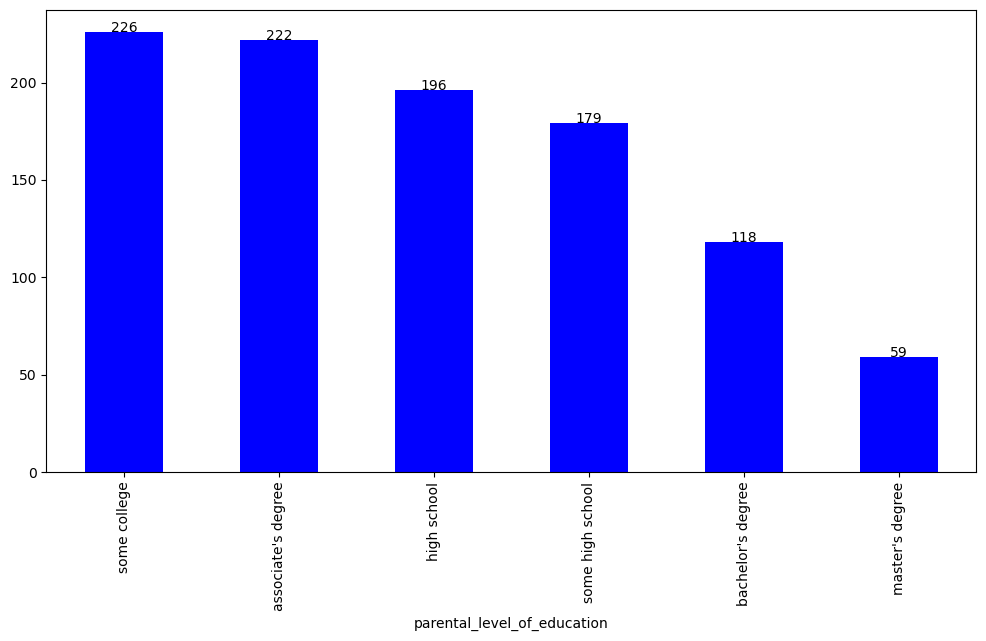

In [96]:
plt.figure(figsize=(12,6))
counts=df['parental_level_of_education'].value_counts()
ax = counts.plot(kind='bar',color='blue')
for i,v in enumerate(counts):
    ax.text(i,v + 0.1, str(v), ha='center')

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


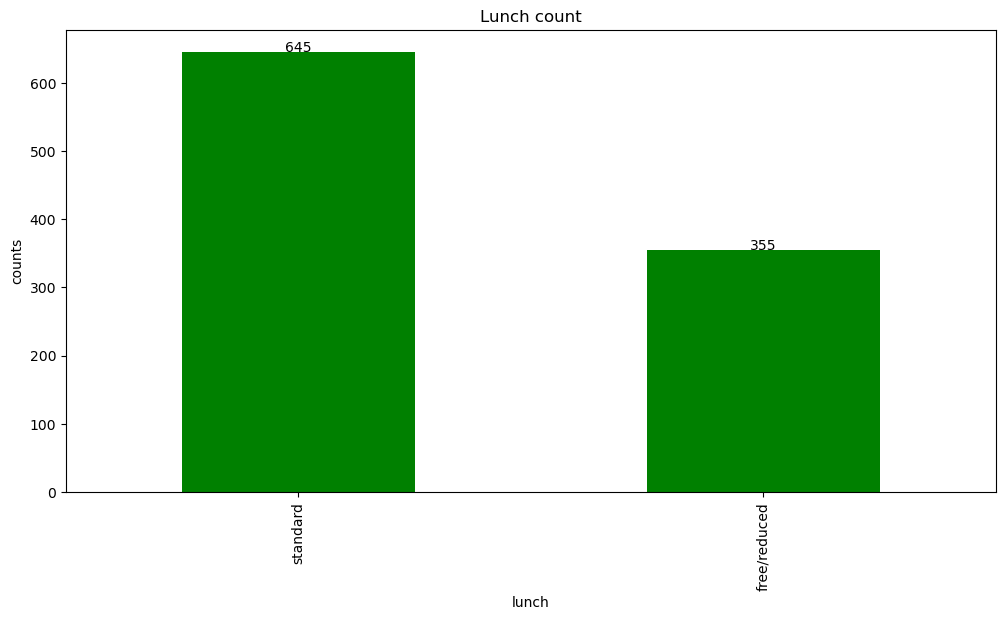

In [103]:
plt.figure(figsize=(12,6))
print(df['lunch'].value_counts())

counts=df['lunch'].value_counts()
ax = counts.plot(kind='bar',color='green')

for i,v in enumerate(counts):
    ax.text(i,v + 0.1, str(v), ha='center')
plt.ylabel("counts")
plt.title("Lunch count")
plt.show()

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


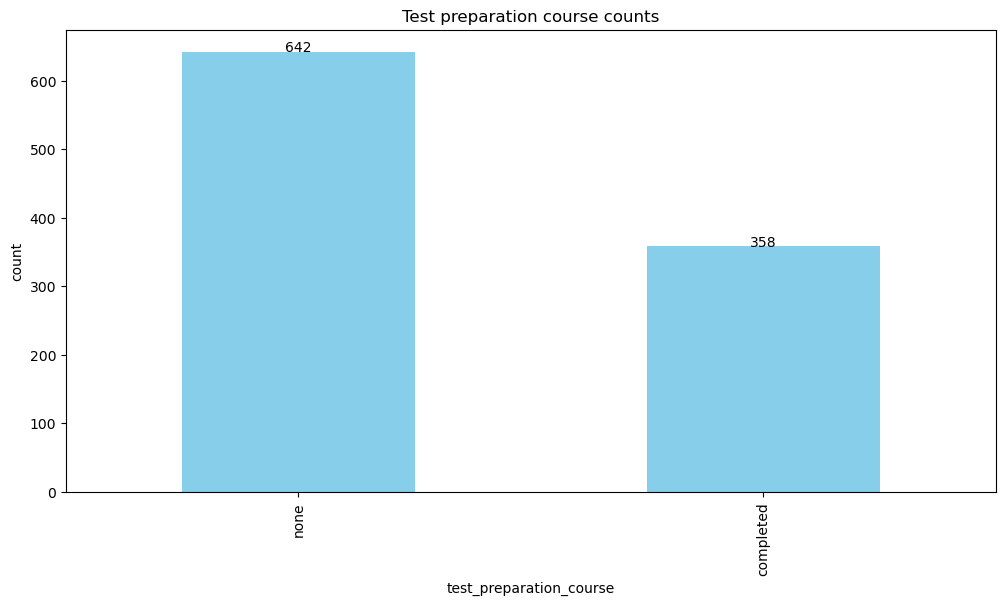

In [106]:
plt.figure(figsize=(12,6))
print(df['test_preparation_course'].value_counts())

counts = df['test_preparation_course'].value_counts()
ax = counts.plot(kind='bar', color='skyblue')

for i,v in enumerate(counts):
    ax.text(i,v + 0.1, str(v), ha='center')


plt.ylabel("count")
plt.title("Test preparation course counts")
plt.show()

️UNIVARIATE ANALYSIS ONE VARIABLE

- Distribution
- Summary stats
- Skew / Outliers

<Axes: >

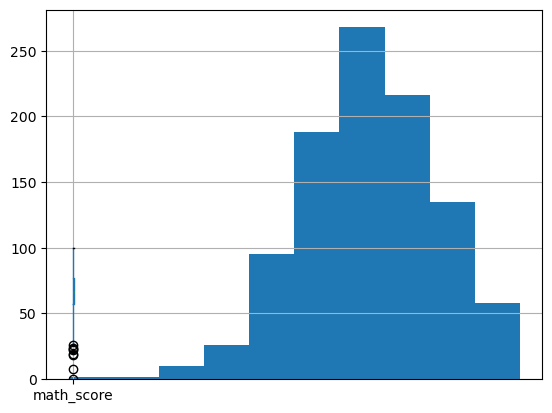

In [114]:
df['math_score'].describe()
df['math_score'].hist()
df.boxplot(column='math_score')

<Axes: >

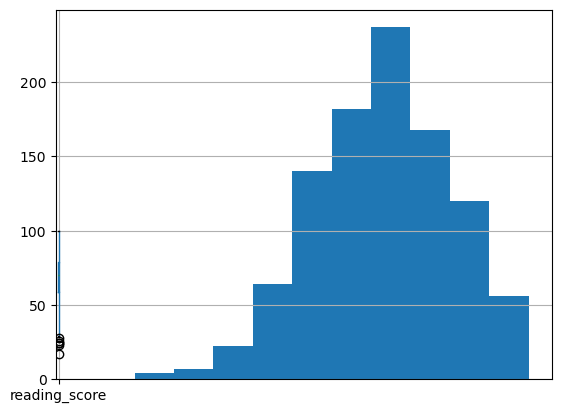

In [117]:
df['reading_score'].describe()
df['reading_score'].hist()
df.boxplot(column="reading_score")

<Axes: >

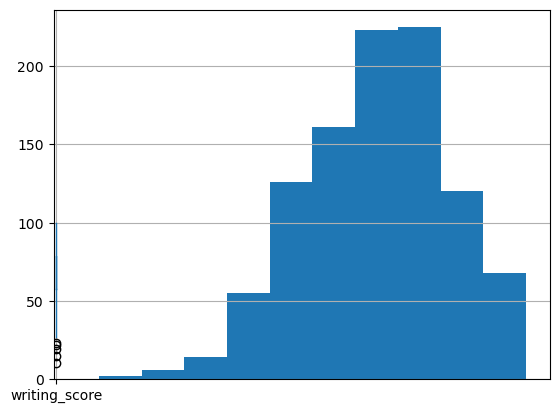

In [118]:
df['writing_score'].describe()
df['writing_score'].hist()
df.boxplot(column="writing_score")

## BIVARIATE ANALYSIS (TWO VARIABLES)

- Relationship
- Comparison
- Dependence

In [120]:
## numerical vs numerical features

In [130]:
import seaborn as sns

,math_score,reading_score
math_score,1.00000,0.81758
reading_score,0.81758,1.00000


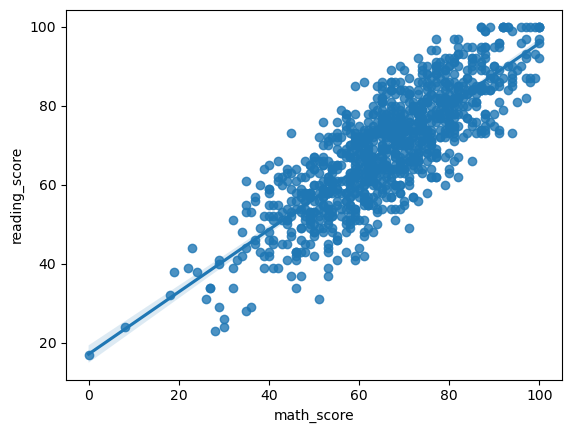

In [134]:
sns.regplot(df,x="math_score",y="reading_score")
df[['math_score',"reading_score"]].corr()

,math_score,writing_score
math_score,1.000000,0.802642
writing_score,0.802642,1.000000


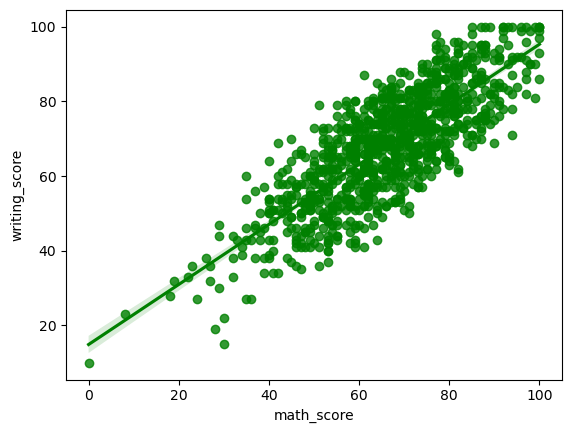

In [136]:
sns.regplot(data=df, x='math_score',y="writing_score",color='green')
df[['math_score',"writing_score"]].corr()

,reading_score,writing_score
reading_score,1.000000,0.954598
writing_score,0.954598,1.000000


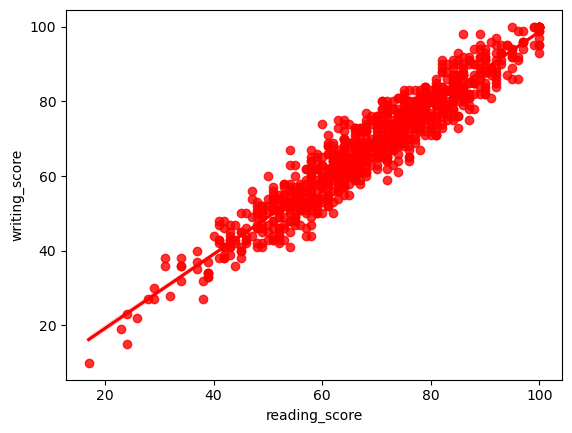

In [138]:
sns.regplot(data=df,x="reading_score",y="writing_score",color='r')
df[['reading_score','writing_score']].corr()

categorical vs categorical

race_ethnicity  group A  group B  group C  group D  group E
gender                                                     
female               36      104      180      129       69
male                 53       86      139      133       71


<Axes: xlabel='gender'>

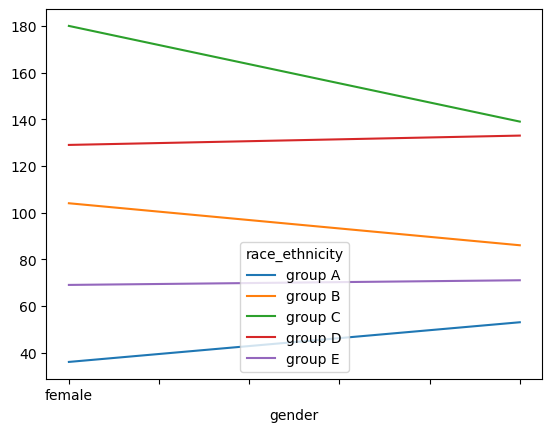

In [144]:
print(pd.crosstab(df['gender'],df['race_ethnicity']))
pd.crosstab(df['gender'], df['race_ethnicity']).plot()

parental_level_of_education  associate's degree  bachelor's degree  \
gender                                                               
female                                      116                 63   
male                                        106                 55   

parental_level_of_education  high school  master's degree  some college  \
gender                                                                    
female                                94               36           118   
male                                 102               23           108   

parental_level_of_education  some high school  
gender                                         
female                                     91  
male                                       88  


<Axes: xlabel='gender'>

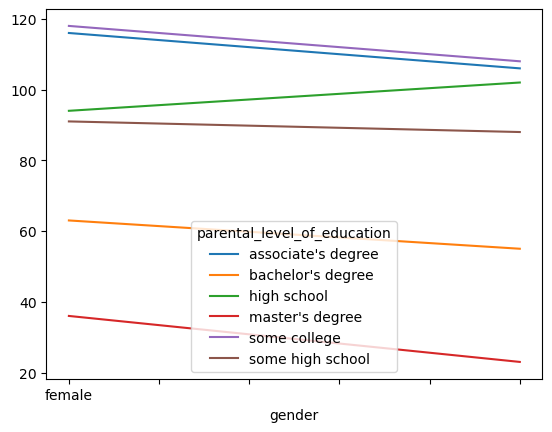

In [149]:
print(pd.crosstab(df['gender'],df['parental_level_of_education']))
pd.crosstab(df['gender'],df['parental_level_of_education']).plot()

lunch   free/reduced  standard
gender                        
female           189       329
male             166       316


<Axes: xlabel='gender'>

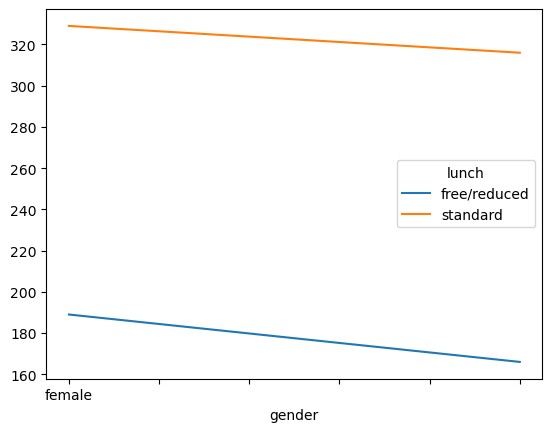

In [154]:
print(pd.crosstab(df['gender'],df['lunch']))
pd.crosstab(df['gender'],df['lunch']).plot()

test_preparation_course  completed  none
gender                                  
female                         184   334
male                           174   308


<Axes: xlabel='gender'>

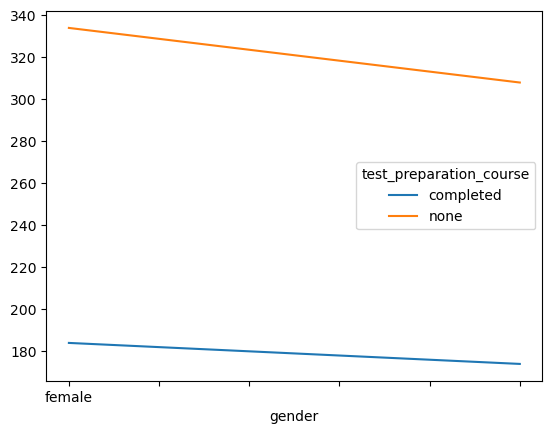

In [155]:
print(pd.crosstab(df['gender'],df['test_preparation_course']))
pd.crosstab(df['gender'],df['test_preparation_course']).plot()

## MULTIVARIATE ANALYSIS (3+ VARIABLES)

- Interaction
- Correlation
- Variation

In [164]:
maxi=df.groupby(['gender', 'race_ethnicity'])['math_score'].max()
avg=df.groupby(['gender', 'race_ethnicity'])['math_score'].mean()
mini=df.groupby(['gender', 'race_ethnicity'])['math_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

max: gender  race_ethnicity
female  group A            92
        group B            97
        group C            96
        group D            98
        group E           100
male    group A           100
        group B            94
        group C            98
        group D           100
        group E           100
Name: math_score, dtype: int64
avg:gender  race_ethnicity
female  group A           58.527778
        group B           61.403846
        group C           62.033333
        group D           65.248062
        group E           70.811594
male    group A           63.735849
        group B           65.930233
        group C           67.611511
        group D           69.413534
        group E           76.746479
Name: math_score, dtype: float64
min:gender  race_ethnicity
female  group A           34
        group B            8
        group C            0
        group D           26
        group E           32
male    group A           28
        group B     

In [165]:
maxi=df.groupby(['gender', 'parental_level_of_education'])['math_score'].max()
avg=df.groupby(['gender', 'parental_level_of_education'])['math_score'].mean()
mini=df.groupby(['gender', 'parental_level_of_education'])['math_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

max: gender  parental_level_of_education
female  associate's degree             100
        bachelor's degree              100
        high school                     99
        master's degree                 94
        some college                   100
        some high school                97
male    associate's degree             100
        bachelor's degree              100
        high school                     94
        master's degree                 95
        some college                   100
        some high school                94
Name: math_score, dtype: int64
avg:gender  parental_level_of_education
female  associate's degree             65.250000
        bachelor's degree              68.349206
        high school                    59.351064
        master's degree                66.500000
        some college                   65.406780
        some high school               59.296703
male    associate's degree             70.764151
        bachelor's degree    

In [166]:
maxi=df.groupby(['gender', 'lunch'])['math_score'].max()
avg=df.groupby(['gender', 'lunch'])['math_score'].mean()
mini=df.groupby(['gender', 'lunch'])['math_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

max: gender  lunch       
female  free/reduced     93
        standard        100
male    free/reduced    100
        standard        100
Name: math_score, dtype: int64
avg:gender  lunch       
female  free/reduced    55.814815
        standard        68.124620
male    free/reduced    62.457831
        standard        72.022152
Name: math_score, dtype: float64
min:gender  lunch       
female  free/reduced     0
        standard        19
male    free/reduced    27
        standard        30
Name: math_score, dtype: int64


In [167]:
maxi=df.groupby(['gender', 'test_preparation_course'])['math_score'].max()
avg=df.groupby(['gender', 'test_preparation_course'])['math_score'].mean()
mini=df.groupby(['gender', 'test_preparation_course'])['math_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

max: gender  test_preparation_course
female  completed                   99
        none                       100
male    completed                  100
        none                        97
Name: math_score, dtype: int64
avg:gender  test_preparation_course
female  completed                  67.195652
        none                       61.670659
male    completed                  72.339080
        none                       66.688312
Name: math_score, dtype: float64
min:gender  test_preparation_course
female  completed                  23
        none                        0
male    completed                  39
        none                       27
Name: math_score, dtype: int64


In [168]:
maxi=df.groupby(['gender', 'race_ethnicity'])['reading_score'].max()
avg=df.groupby(['gender', 'race_ethnicity'])['reading_score'].mean()
mini=df.groupby(['gender', 'race_ethnicity'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

max: gender  race_ethnicity
female  group A           100
        group B            97
        group C           100
        group D           100
        group E           100
male    group A            96
        group B            96
        group C           100
        group D            97
        group E           100
Name: reading_score, dtype: int64
avg:gender  race_ethnicity
female  group A           69.000000
        group B           71.076923
        group C           71.944444
        group D           74.046512
        group E           75.840580
male    group A           61.735849
        group B           62.848837
        group C           65.424460
        group D           66.135338
        group E           70.295775
Name: reading_score, dtype: float64
min:gender  race_ethnicity
female  group A           43
        group B           24
        group C           17
        group D           31
        group E           34
male    group A           23
        group 

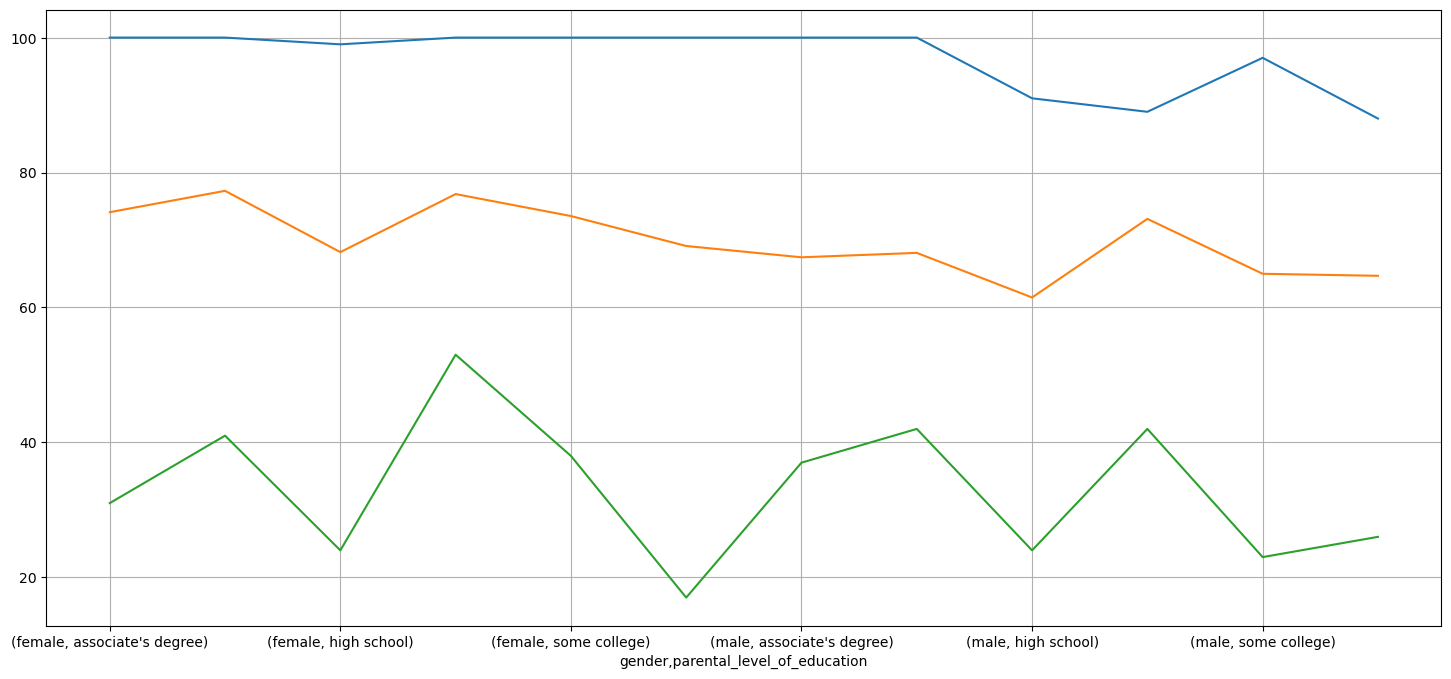

max: gender  parental_level_of_education
female  associate's degree             100
        bachelor's degree              100
        high school                     99
        master's degree                100
        some college                   100
        some high school               100
male    associate's degree             100
        bachelor's degree              100
        high school                     91
        master's degree                 89
        some college                    97
        some high school                88
Name: reading_score, dtype: int64
avg:gender  parental_level_of_education
female  associate's degree             74.120690
        bachelor's degree              77.285714
        high school                    68.202128
        master's degree                76.805556
        some college                   73.550847
        some high school               69.109890
male    associate's degree             67.433962
        bachelor's degree 

In [175]:
plt.figure(figsize=(18,8))
maxi=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].max().plot()
avg=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].mean().plot()
mini=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].min().plot()
plt.grid()
plt.show()


maxi=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].max()
avg=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].mean()
mini=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

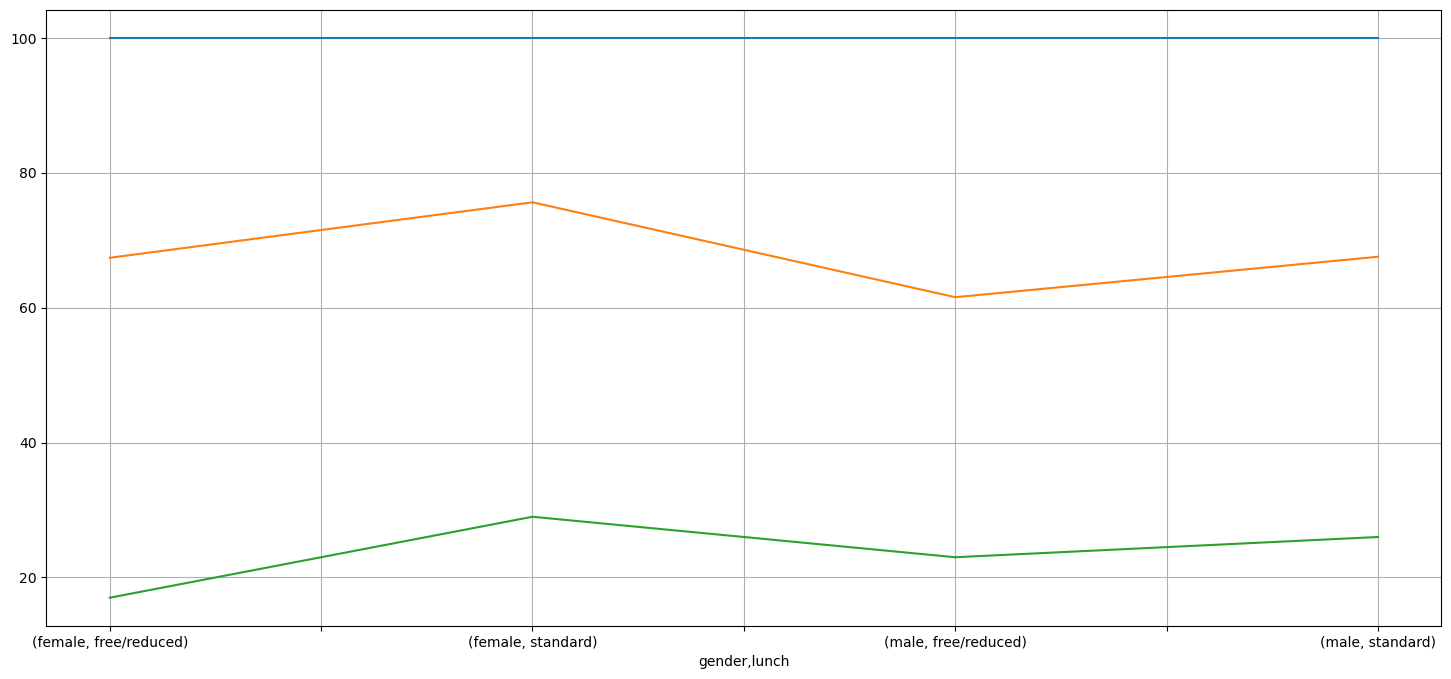

max: gender  lunch       
female  free/reduced    100
        standard        100
male    free/reduced    100
        standard        100
Name: reading_score, dtype: int64
avg:gender  lunch       
female  free/reduced    67.386243
        standard        75.607903
male    free/reduced    61.542169
        standard        67.537975
Name: reading_score, dtype: float64
min:gender  lunch       
female  free/reduced    17
        standard        29
male    free/reduced    23
        standard        26
Name: reading_score, dtype: int64


In [176]:
plt.figure(figsize=(18,8))
maxi=df.groupby(['gender', 'lunch'])['reading_score'].max().plot()
avg=df.groupby(['gender', 'lunch'])['reading_score'].mean().plot()
mini=df.groupby(['gender', 'lunch'])['reading_score'].min().plot()
plt.grid()
plt.show()


maxi=df.groupby(['gender', 'lunch'])['reading_score'].max()
avg=df.groupby(['gender', 'lunch'])['reading_score'].mean()
mini=df.groupby(['gender', 'lunch'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

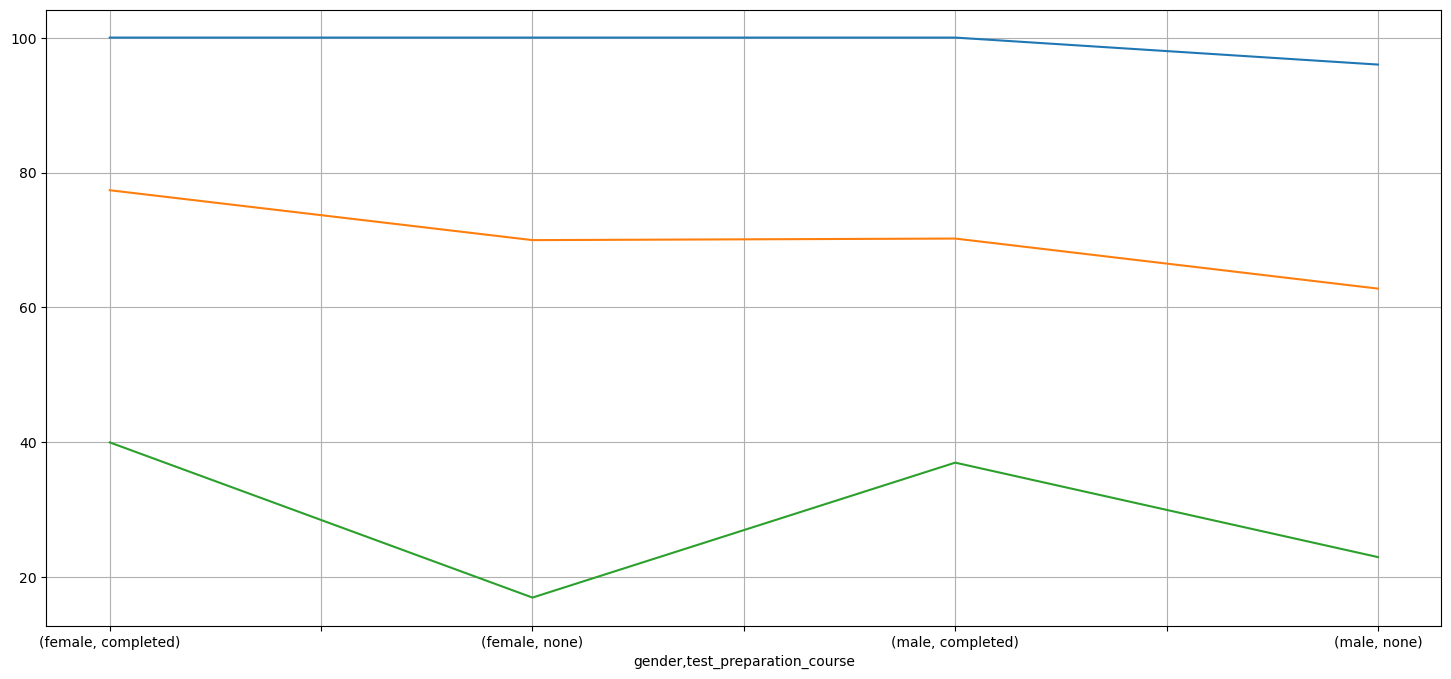

max: gender  test_preparation_course
female  completed                  100
        none                       100
male    completed                  100
        none                        96
Name: reading_score, dtype: int64
avg:gender  test_preparation_course
female  completed                  77.375000
        none                       69.982036
male    completed                  70.212644
        none                       62.795455
Name: reading_score, dtype: float64
min:gender  test_preparation_course
female  completed                  40
        none                       17
male    completed                  37
        none                       23
Name: reading_score, dtype: int64


In [177]:
plt.figure(figsize=(18,8))
maxi=df.groupby(['gender', 'test_preparation_course'])['reading_score'].max().plot()
avg=df.groupby(['gender', 'test_preparation_course'])['reading_score'].mean().plot()
mini=df.groupby(['gender', 'test_preparation_course'])['reading_score'].min().plot()
plt.grid()
plt.show()


maxi=df.groupby(['gender', 'test_preparation_course'])['reading_score'].max()
avg=df.groupby(['gender', 'test_preparation_course'])['reading_score'].mean()
mini=df.groupby(['gender', 'test_preparation_course'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

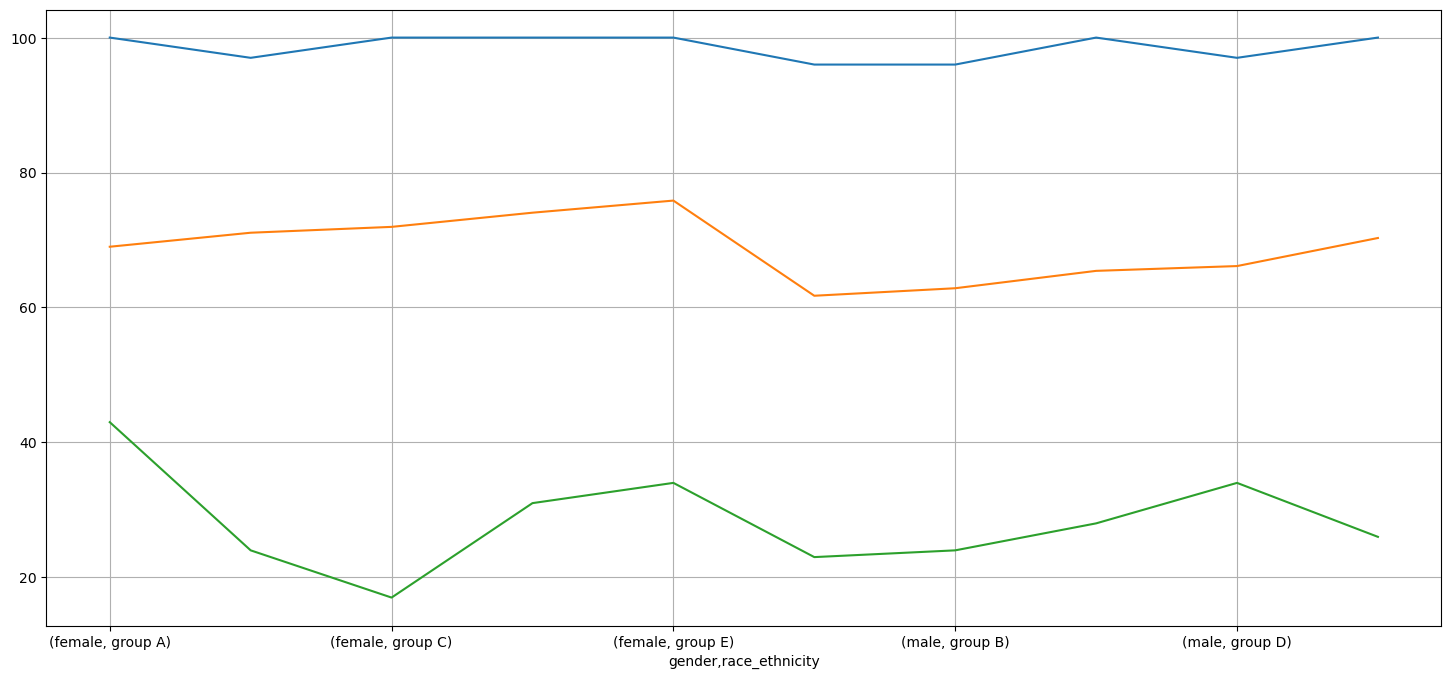

max: gender  race_ethnicity
female  group A           100
        group B            97
        group C           100
        group D           100
        group E           100
male    group A            96
        group B            96
        group C           100
        group D            97
        group E           100
Name: reading_score, dtype: int64
avg:gender  race_ethnicity
female  group A           69.000000
        group B           71.076923
        group C           71.944444
        group D           74.046512
        group E           75.840580
male    group A           61.735849
        group B           62.848837
        group C           65.424460
        group D           66.135338
        group E           70.295775
Name: reading_score, dtype: float64
min:gender  race_ethnicity
female  group A           43
        group B           24
        group C           17
        group D           31
        group E           34
male    group A           23
        group 

In [178]:
plt.figure(figsize=(18,8))
maxi=df.groupby(['gender', 'race_ethnicity'])['reading_score'].max().plot()
avg=df.groupby(['gender', 'race_ethnicity'])['reading_score'].mean().plot()
mini=df.groupby(['gender', 'race_ethnicity'])['reading_score'].min().plot()
plt.grid()
plt.show()


maxi=df.groupby(['gender', 'race_ethnicity'])['reading_score'].max()
avg=df.groupby(['gender', 'race_ethnicity'])['reading_score'].mean()
mini=df.groupby(['gender', 'race_ethnicity'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")

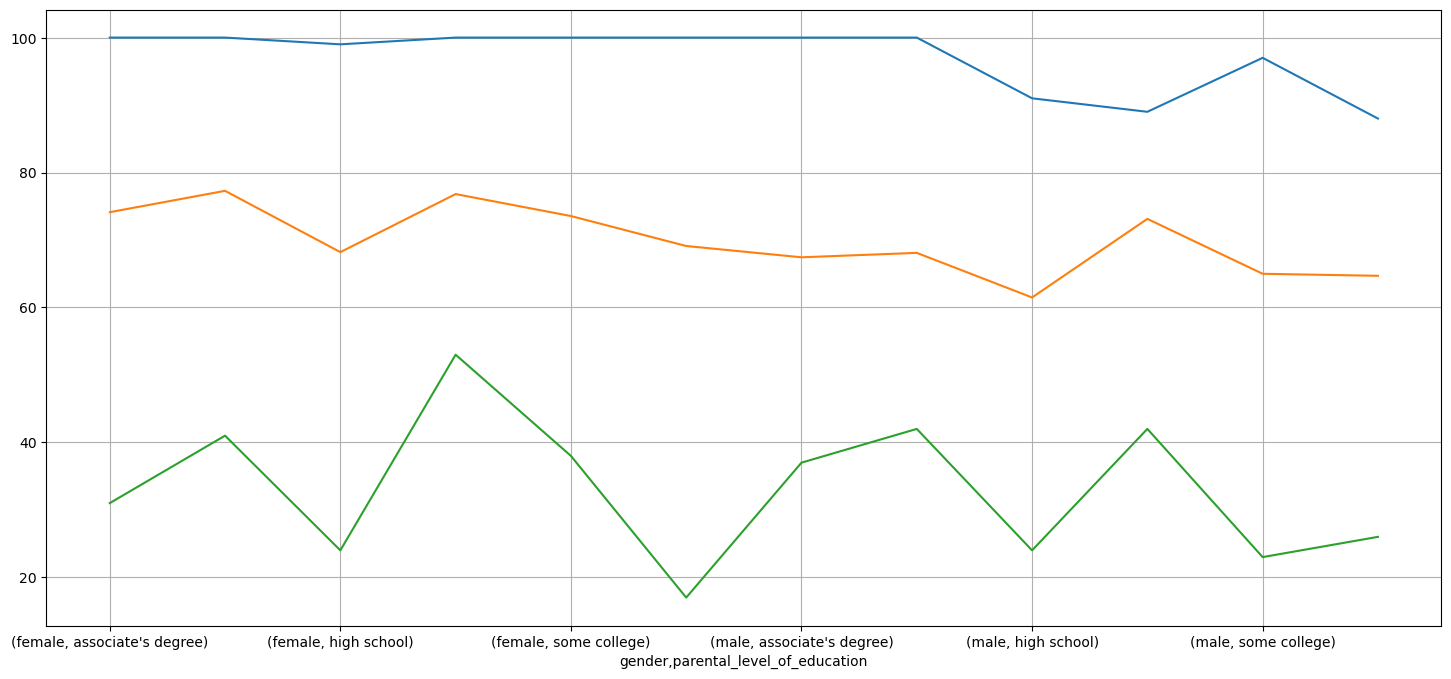

max: gender  parental_level_of_education
female  associate's degree             100
        bachelor's degree              100
        high school                     99
        master's degree                100
        some college                   100
        some high school               100
male    associate's degree             100
        bachelor's degree              100
        high school                     91
        master's degree                 89
        some college                    97
        some high school                88
Name: reading_score, dtype: int64
avg:gender  parental_level_of_education
female  associate's degree             74.120690
        bachelor's degree              77.285714
        high school                    68.202128
        master's degree                76.805556
        some college                   73.550847
        some high school               69.109890
male    associate's degree             67.433962
        bachelor's degree 

In [179]:
plt.figure(figsize=(18,8))
maxi=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].max().plot()
avg=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].mean().plot()
mini=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].min().plot()
plt.grid()
plt.show()


maxi=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].max()
avg=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].mean()
mini=df.groupby(['gender', 'parental_level_of_education'])['reading_score'].min()
print(f"max: {maxi}")
print(f"avg:{avg}")
print(f"min:{mini}")